<a href="https://colab.research.google.com/github/abaskon/LiteratureReviewRobotics/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Metrics that can used
1.  
2.  
3.  
4.  

In [ ]:
!git clone https://github.com/abaskon/Time_series.git

Cloning into 'Time_series'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 96 (delta 43), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (96/96), done.


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import IPython
import IPython.display
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [ ]:

url_json = 'https://raw.githubusercontent.com/abaskon/Time_series/main/brar_square_Nov5_Nov12.json'
df2 = pd.read_json(url_json,encoding = 'unicode_escape')


In [ ]:
df2.to_csv("CSV.csv")

In [ ]:
df2.head(10)

,_id,station,createdAt,congestions,miscCongestions,updatedAt,__v
0,618426ad42b6a33874761e4f,612257f368b8102b4cbf634e,2021-11-04T18:30:01.000Z,"[{'bayId': '612257f368b8102b4cbf6358', 'conges...","[{'bayId': '612257f368b8102b4cbf635c', 'conges...",2021-11-04T18:30:05.196Z,0
1,6184274142b6a33874761ee9,612257f368b8102b4cbf634e,2021-11-04T18:32:01.000Z,"[{'bayId': '612257f368b8102b4cbf6357', 'conges...","[{'bayId': '612257f368b8102b4cbf635c', 'conges...",2021-11-04T18:32:33.913Z,0
2,6184276442b6a33874761ef6,612257f368b8102b4cbf634e,2021-11-04T18:33:01.000Z,"[{'bayId': '612257f368b8102b4cbf6357', 'conges...",[],2021-11-04T18:33:08.252Z,0
3,6184279f5bbb89386da9b511,612257f368b8102b4cbf634e,2021-11-04T18:34:02.000Z,"[{'bayId': '612257f368b8102b4cbf6355', 'conges...",[],2021-11-04T18:34:07.448Z,0
4,618427da5bbb89386da9b5a7,612257f368b8102b4cbf634e,2021-11-04T18:35:02.000Z,"[{'bayId': '612257f368b8102b4cbf6355', 'conges...","[{'bayId': '612257f368b8102b4cbf635c', 'conges...",2021-11-04T18:35:06.638Z,0
5,618428155bbb89386da9b635,612257f368b8102b4cbf634e,2021-11-04T18:36:01.000Z,"[{'bayId': '612257f368b8102b4cbf6355', 'conges...","[{'bayId': '612257f368b8102b4cbf635c', 'conges...",2021-11-04T18:36:05.984Z,0
6,6184285142b6a33874762179,612257f368b8102b4cbf634e,2021-11-04T18:37:01.000Z,"[{'bayId': '612257f368b8102b4cbf6355', 'conges...","[{'bayId': '612257f368b8102b4cbf635c', 'conges...",2021-11-04T18:37:05.303Z,0
7,6184288d5bbb89386da9b776,612257f368b8102b4cbf634e,2021-11-04T18:38:01.000Z,"[{'bayId': '612257f368b8102b4cbf6355', 'conges...","[{'bayId': '612257f368b8102b4cbf635c', 'conges...",2021-11-04T18:38:05.624Z,0
8,618428c942b6a3387476229a,612257f368b8102b4cbf634e,2021-11-04T18:39:01.000Z,"[{'bayId': '612257f368b8102b4cbf6355', 'conges...","[{'bayId': '612257f368b8102b4cbf635c', 'conges...",2021-11-04T18:39:05.595Z,0
9,618429055bbb89386da9b8b5,612257f368b8102b4cbf634e,2021-11-04T18:40:01.000Z,"[{'bayId': '612257f368b8102b4cbf6359', 'conges...","[{'bayId': '612257f368b8102b4cbf635c', 'conges...",2021-11-04T18:40:05.664Z,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id              9226 non-null   object
 1   station          9226 non-null   object
 2   createdAt        9226 non-null   object
 3   congestions      9226 non-null   object
 4   miscCongestions  9226 non-null   object
 5   updatedAt        9226 non-null   object
 6   __v              9226 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 504.7+ KB


In [ ]:
pd.unique(df2.station)
#Unique Staion Id No : 612257f368b8102b4cbf634e

array(['612257f368b8102b4cbf634e'], dtype=object)

In [ ]:
# trial snippet for the upcoming loop

row = 100 #the row of the dataframe (random value assigned)
bayno = 2 #The Sl number of the bay 
vType_count= len(df2.congestions[row][bayno]['congestion']) #the number of types of vehicles 
df2.congestions[row][bayno]['congestion']



[{'count': 1, 'vType': 'car'}]

In [ ]:
#initialise Fixed details of the station
BC = pd.DataFrame(columns = ['Bay1', 'Bay2', 'Bay3', 'Bay4', 'Bay5', 'Bay6', 'Bay7', 'Bay8', 'Bay9'])
Total_bays_in_the_station= 9
######################################################

def total_vehicles_in_bays(row):
  active_bays = len(df2.congestions[row])
  baywise_count = [0] * Total_bays_in_the_station
  for bayno in range(active_bays):
   v_types = len(df2.congestions[row][bayno]['congestion'])
   for v in range(v_types):
      baywise_count[bayno] = baywise_count[bayno] + df2.congestions[row][bayno]['congestion'][v]['count']
 
  BC.loc[row] = baywise_count


######################################################


tot_rows = len(df2.congestions)
for row in range(tot_rows):
  
  total_vehicles_in_bays(row)


In [ ]:
df2.congestions[100]

[{'bayId': '612257f368b8102b4cbf6355',
  'congestion': [{'count': 1, 'vType': 'car'}]},
 {'bayId': '612257f368b8102b4cbf6357',
  'congestion': [{'count': 1, 'vType': 'car'}]},
 {'bayId': '612257f368b8102b4cbf6353',
  'congestion': [{'count': 1, 'vType': 'car'}]}]

In [ ]:
v_types = ['bike', 'auto', 'car', 'hmv']

a =v_types.index(df2.congestions[100][2]['congestion'][1]['vType'])

IndexError: ignored

In [ ]:
#initialise Fixed details of the station
vehicles = ['bike', 'auto', 'car', 'hmv']
VC = pd.DataFrame(columns = v_types)
BC = pd.DataFrame(columns = ['Bay1', 'Bay2', 'Bay3', 'Bay4', 'Bay5', 'Bay6', 'Bay7', 'Bay8', 'Bay9'])
Total_bays_in_the_station= 9
######################################################

def total_vehicles_in_bays(row):
  active_bays = len(df2.congestions[row])
  baywise_count = [0] * Total_bays_in_the_station
  vehicles_count =[0] * 4

  for bayno in range(active_bays):
   v_types = len(df2.congestions[row][bayno]['congestion'])
   for v in range(v_types):
      baywise_count[bayno] = baywise_count[bayno] + df2.congestions[row][bayno]['congestion'][v]['count']
      vehicle_index = vehicles.index(df2.congestions[row][bayno]['congestion'][v]['vType'])
      vehicles_count[vehicle_index] = vehicles_count[vehicle_index] + df2.congestions[row][bayno]['congestion'][v]['count']
 
  BC.loc[row] = baywise_count
  VC.loc[row]=  vehicles_count


######################################################


tot_rows = len(df2.congestions)
for row in range(tot_rows):
  
  total_vehicles_in_bays(row)

In [ ]:
print("Mean\n\n",BC.mean(axis=0),"\n\n")
print("Max\n\n",BC.max(axis=0),"\n\n")

print("Mean\n\n",VC.mean(axis=0),"\n\n")
print("Max\n\n",VC.max(axis=0),"\n\n")

Mean

 Bay1    1.803924
Bay2    1.492413
Bay3    1.289400
Bay4    1.349339
Bay5    1.546716
Bay6    1.482874
Bay7    1.184912
Bay8    0.818448
Bay9    0.343052
dtype: float64 


Max

 Bay1    7.0
Bay2    6.0
Bay3    7.0
Bay4    7.0
Bay5    8.0
Bay6    8.0
Bay7    7.0
Bay8    7.0
Bay9    5.0
dtype: float64 


Mean

 bike    0.029699
auto    1.152612
car     7.863321
hmv     2.265445
dtype: float64 


Max

 bike     4.0
auto    10.0
car     22.0
hmv      9.0
dtype: float64 




In [ ]:
BC['Total'] =BC.Bay1+BC.Bay2+BC.Bay3+BC.Bay4+BC.Bay5+BC.Bay6+BC.Bay7+BC.Bay8+BC.Bay9
train_time = pd.to_datetime(df2['createdAt'])
train_time

0      2021-11-04 18:30:01+00:00
1      2021-11-04 18:32:01+00:00
2      2021-11-04 18:33:01+00:00
3      2021-11-04 18:34:02+00:00
4      2021-11-04 18:35:02+00:00
                  ...           
9221   2021-11-11 18:25:01+00:00
9222   2021-11-11 18:26:01+00:00
9223   2021-11-11 18:27:02+00:00
9224   2021-11-11 18:28:01+00:00
9225   2021-11-11 18:29:01+00:00
Name: createdAt, Length: 9226, dtype: datetime64[ns, UTC]

In [ ]:
VC.head(6)

,bike,auto,car,hmv
0,0,0,1,0
1,0,0,3,0
2,0,0,5,0
3,0,0,3,3
4,0,0,2,3
5,0,0,2,2


In [ ]:
import matplotlib.pyplot as plt

def plot_df(df, x, y, title, xlabel, ylabel, dpi=100):
    plt.figure(figsize=(30,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


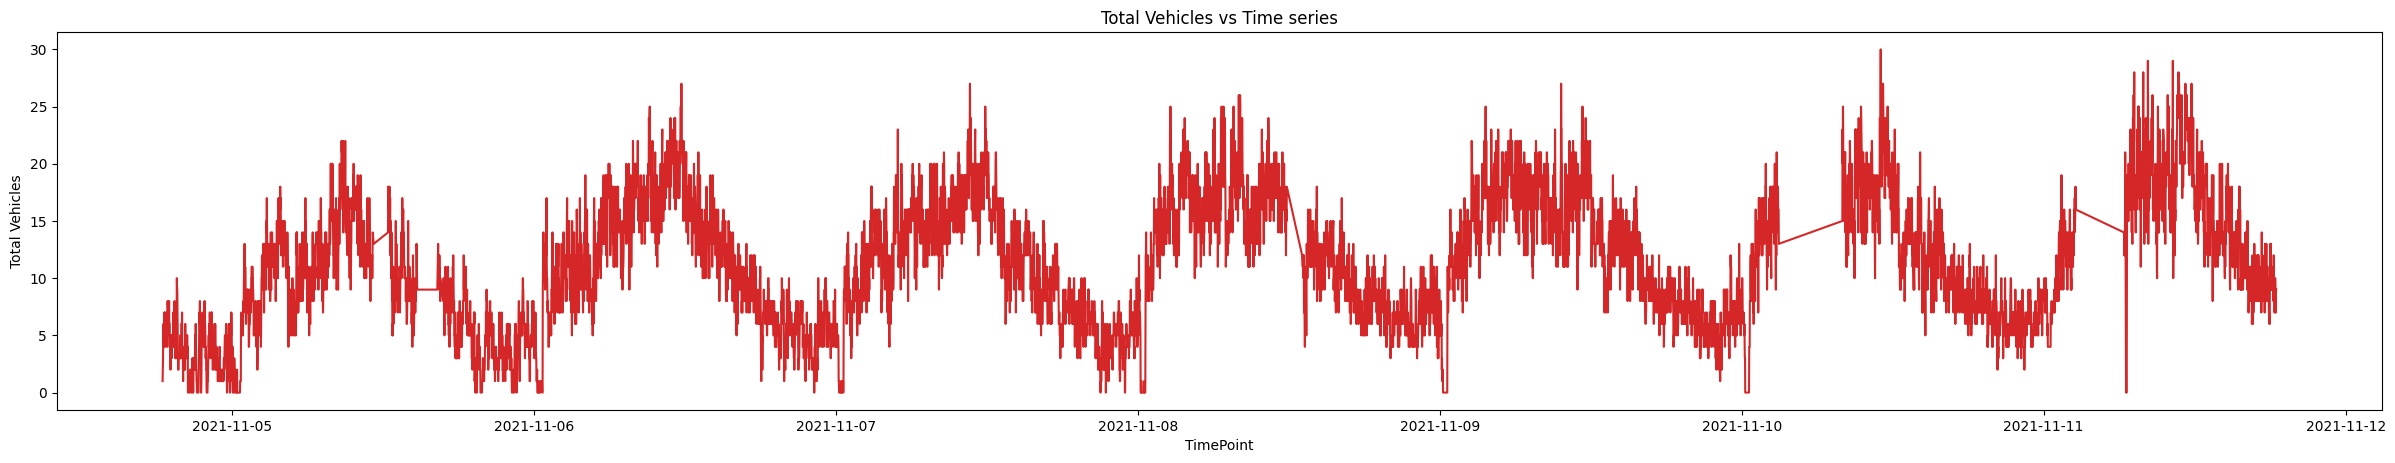

In [ ]:
plot_df(BC, x= train_time, y=(BC.Total), title='Total Vehicles vs Time series', xlabel='TimePoint', ylabel='Total Vehicles') 

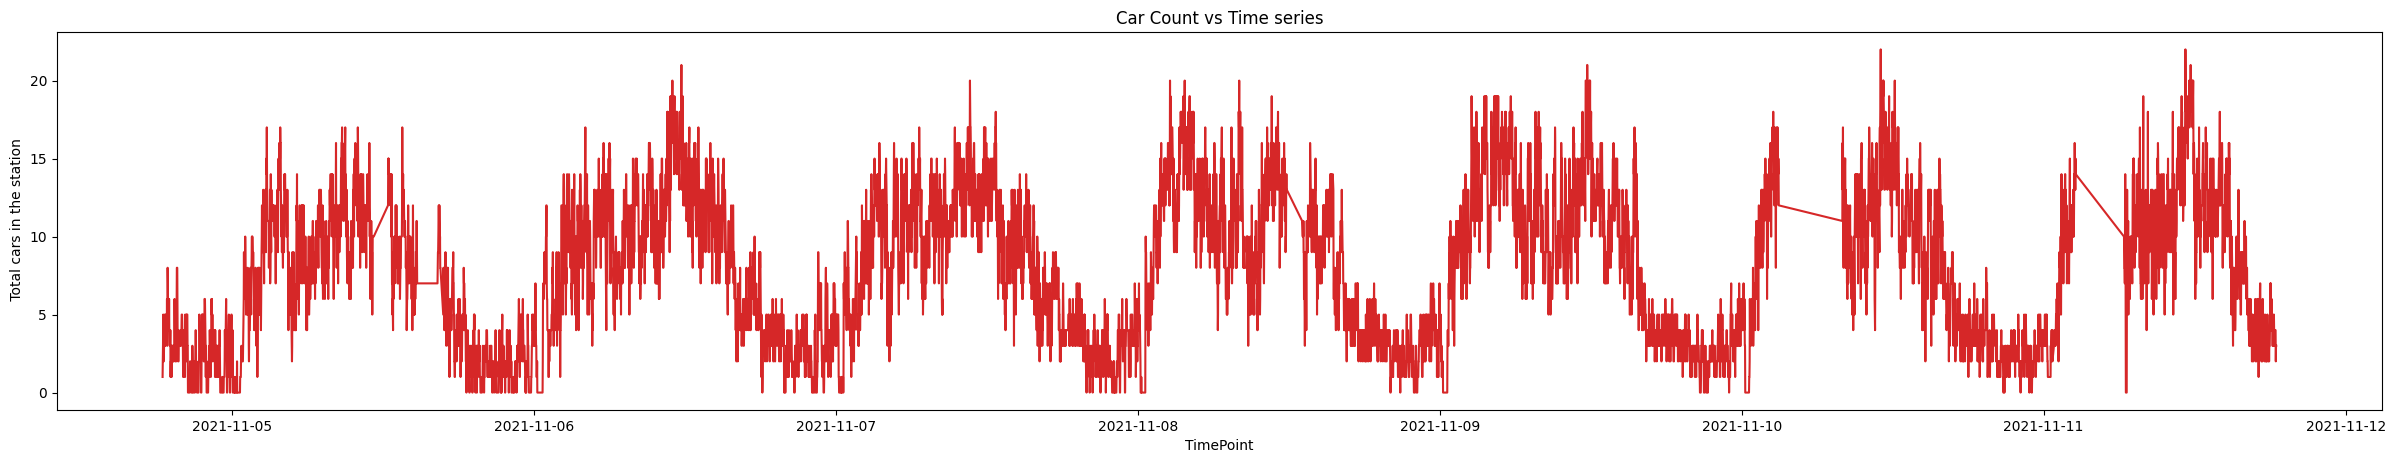

In [ ]:
plot_df(VC, x = train_time, y=VC.car, title='Car Count vs Time series', xlabel='TimePoint', ylabel=' Total cars in the station') 

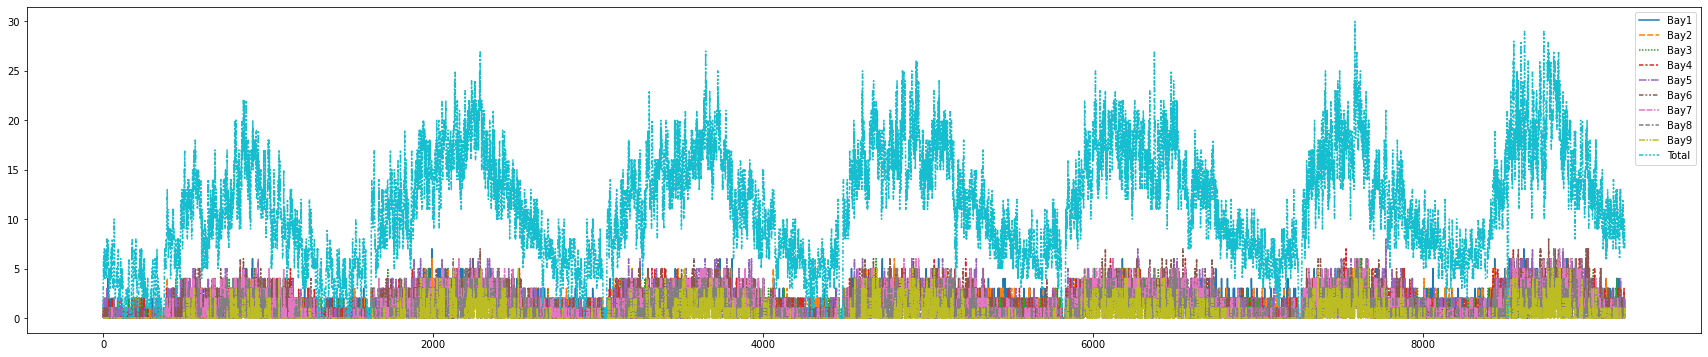

In [ ]:
plt.figure(figsize=(30,6))

sns.lineplot( data=BC,)

Text(0, 0.5, 'Total Cars')

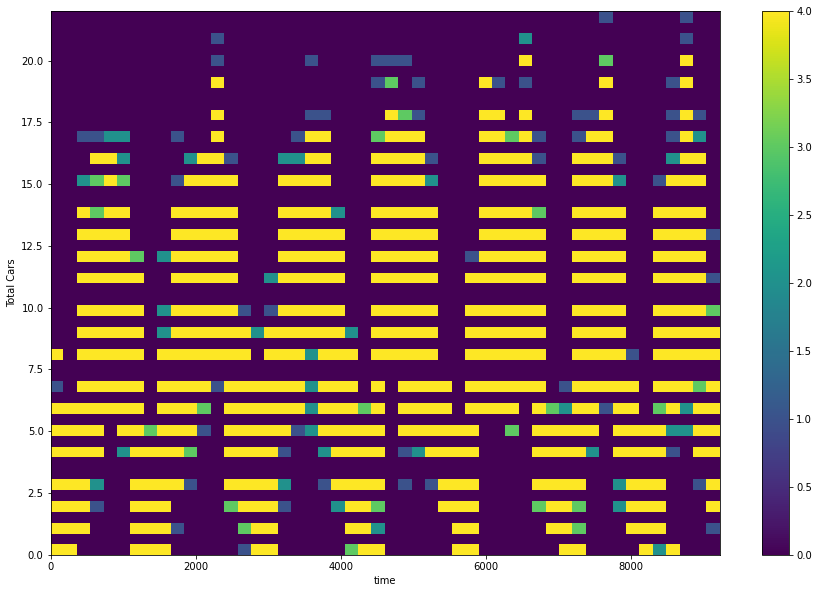

In [ ]:
plt.figure(figsize=(15,10))
plt.hist2d( VC.index, VC['car'],bins=(50, 50), vmax=4)
plt.colorbar()

plt.xlabel('time')
plt.ylabel('Total Cars')

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
BC.head()

,Bay1,Bay2,Bay3,Bay4,Bay5,Bay6,Bay7,Bay8,Bay9,Total
0,1,0,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0,3
2,1,1,1,1,1,0,0,0,0,5
3,1,1,1,1,2,0,0,0,0,6
4,1,1,1,1,1,0,0,0,0,5


In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(VC['car']).reshape(-1,1))


In [ ]:
df1.shape

(9226, 1)

In [ ]:
print(df1)

[[0.04545455]
 [0.13636364]
 [0.22727273]
 ...
 [0.09090909]
 [0.13636364]
 [0.13636364]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(5996, 3230)

In [ ]:
train_data

array([[0.04545455],
       [0.13636364],
       [0.22727273],
       ...,
       [0.54545455],
       [0.54545455],
       [0.59090909]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(5895, 100)
(5895,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(3129, 100)
(3129,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
93/93 [==============================] - 26s 216ms/step - loss: 0.0202 - val_loss: 0.0130
Epoch 2/100
93/93 [==============================] - 19s 203ms/step - loss: 0.0105 - val_loss: 0.0109
Epoch 3/100
93/93 [==============================] - 19s 203ms/step - loss: 0.0092 - val_loss: 0.0098
Epoch 4/100
93/93 [==============================] - 19s 203ms/step - loss: 0.0085 - val_loss: 0.0094
Epoch 5/100
93/93 [==============================] - 19s 199ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 6/100
93/93 [==============================] - 18s 197ms/step - loss: 0.0072 - val_loss: 0.0077
Epoch 7/100
93/93 [==============================] - 18s 196ms/step - loss: 0.0067 - val_loss: 0.0073
Epoch 8/100
93/93 [==============================] - 18s 196ms/step - loss: 0.0061 - val_loss: 0.0068
Epoch 9/100
93/93 [==============================] - 18s 196ms/step - loss: 0.0061 - val_loss: 0.0077
Epoch 10/100
93/93 [==============================] - 18s 195ms/step - loss: 0.005

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
#prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8.354708255074012

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

8.968497778205089

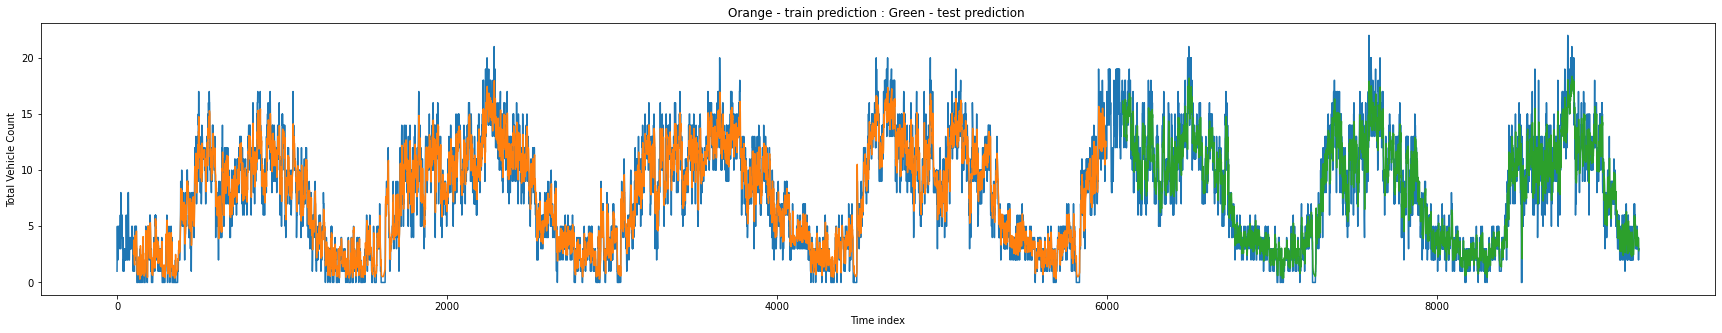

In [ ]:

# shift train predictions for plotting
from pylab import rcParams
rcParams['figure.figsize'] = 30, 5
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().set(title="Orange - train prediction : Green - test prediction ", xlabel="Time index", ylabel="Total Vehicle Count")
plt.show()

In [ ]:
L=len(test_data)
L

3230

In [ ]:
x_input=test_data[(L-100):].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
#prediction for the next N time points
N=1000

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<N):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
time_new=np.arange(1,1001)
time_after=np.arange(1001,2001)

In [ ]:
l=len(df1)
l

9226

In [ ]:
import matplotlib.pyplot as plt

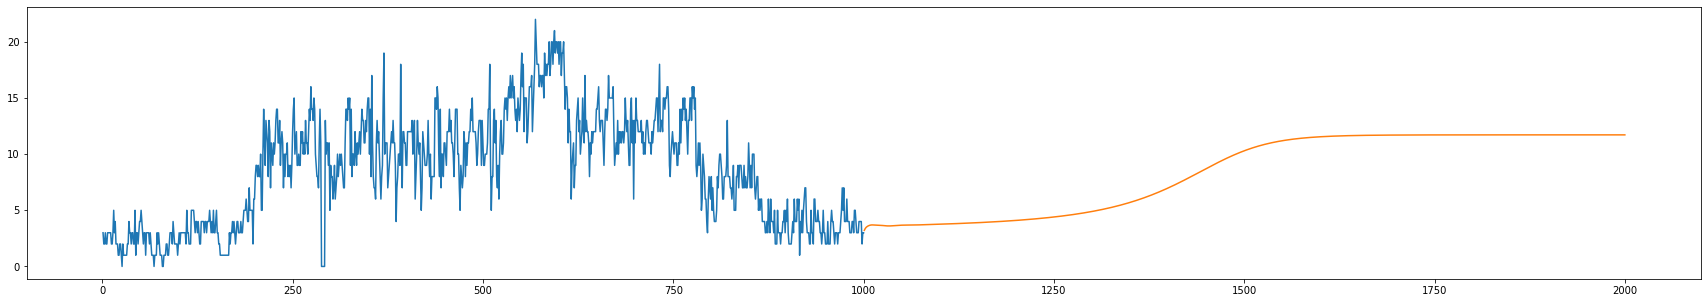

In [ ]:
#Orange shows the prediction, blue shows the time series data

plt.plot(time_new,scaler.inverse_transform(df1[(l-1000):]))
plt.plot(time_after,scaler.inverse_transform(lst_output))

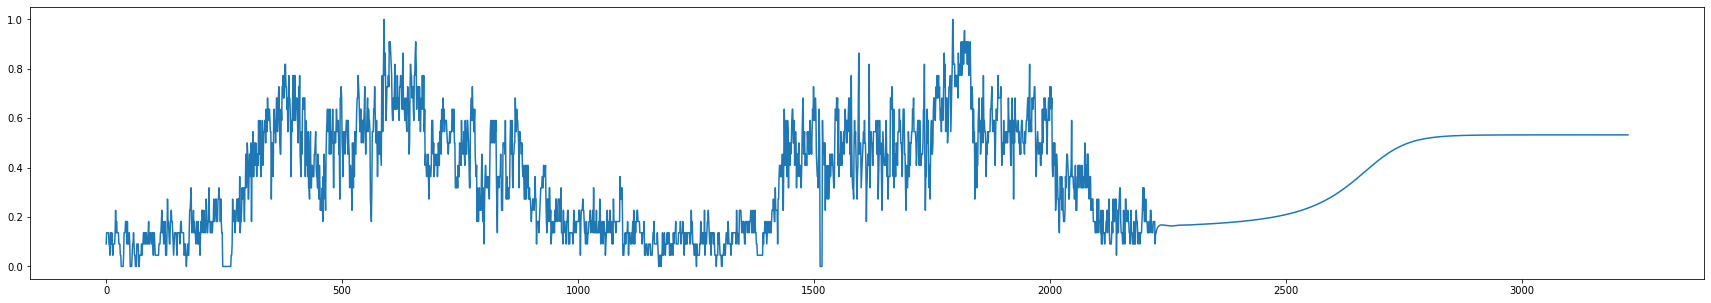

In [ ]:
#zoomed out view
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[7000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

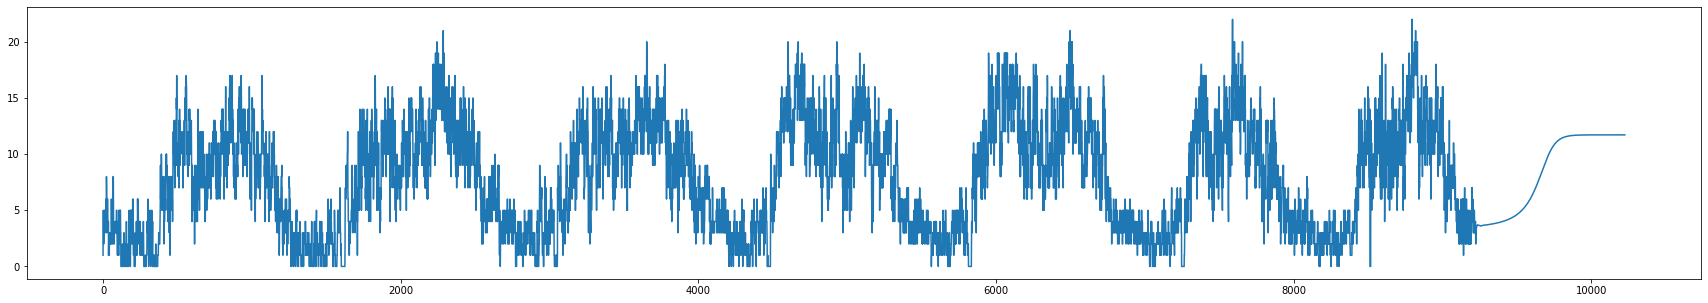

In [ ]:
plt.plot(df3)